# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

INI DATASEET SAYA YANG UNLABEL : https://www.kaggle.com/datasets/ifeomaozo/unlabeleddata

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [22]:
data = pd.read_csv('/content/UnlabeledWiDS2021.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [23]:
print("\nDataset Preview:")
data.head()


Dataset Preview:


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [24]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Columns: 180 entries, Unnamed: 0 to solid_tumor_with_metastasis
dtypes: float64(156), int64(18), object(6)
memory usage: 14.1+ MB
None


In [25]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0                        0
encounter_id                      0
hospital_id                       0
age                               0
bmi                            1015
                               ... 
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
Length: 180, dtype: int64


In [26]:
# Basic statistics
print("\nDataset Statistics:")
print(data.describe())


Dataset Statistics:
         Unnamed: 0   encounter_id   hospital_id           age          bmi  \
count  10234.000000   10234.000000  10234.000000  10234.000000  9219.000000   
mean    5117.500000  140498.779461  10092.391929     62.853625    29.116463   
std     2954.445661    3182.455522     57.008062     17.851661     8.342873   
min        1.000000  135000.000000  10001.000000     18.000000    14.900000   
25%     2559.250000  137742.250000  10043.000000     52.000000    23.700000   
50%     5117.500000  140503.500000  10085.000000     65.000000    27.600000   
75%     7675.750000  143252.750000  10145.000000     76.000000    32.600000   
max    10234.000000  146000.000000  10199.000000     96.000000    69.944000   

       elective_surgery       height        icu_id  pre_icu_los_days  \
count      10234.000000  9933.000000  10234.000000      10234.000000   
mean           0.200117   169.276414    677.823725          0.831339   
std            0.400107    10.805701    304.116531 

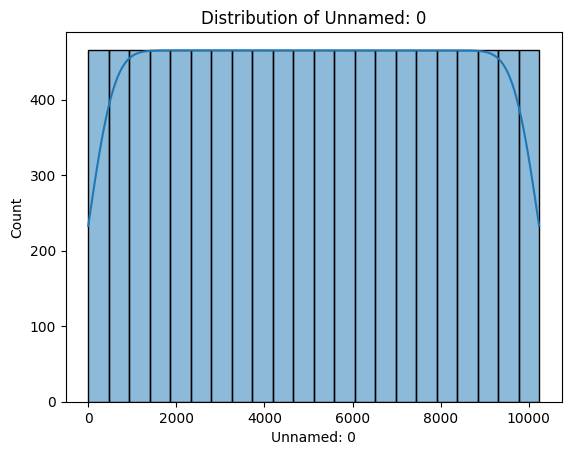

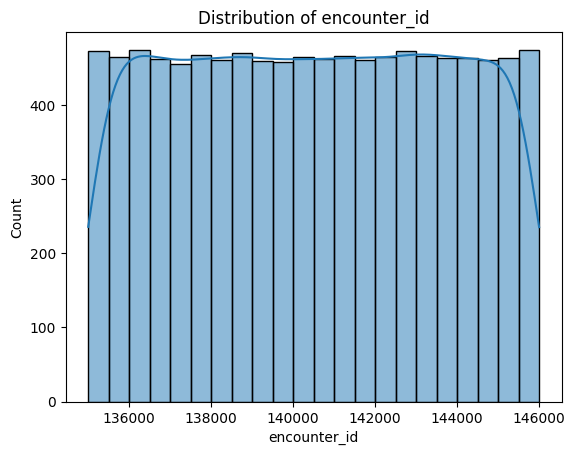

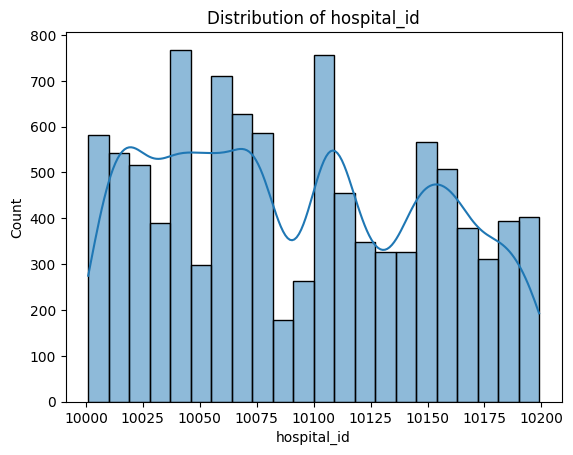

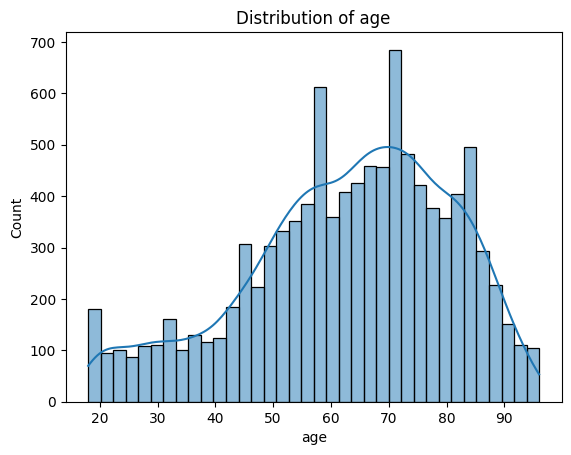

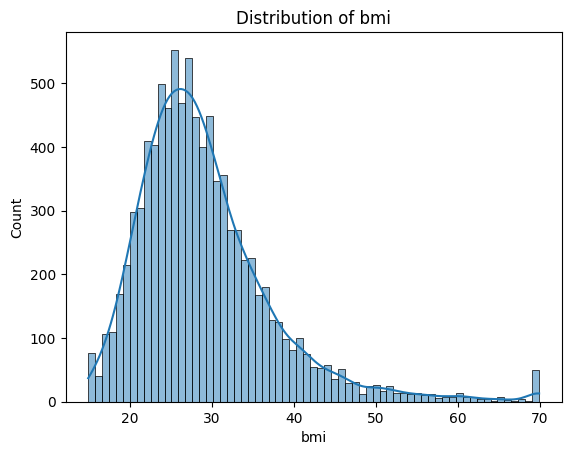

In [27]:
# Visualize distributions of numerical data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols[:5]:  # Limit to first 5 columns for brevity
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

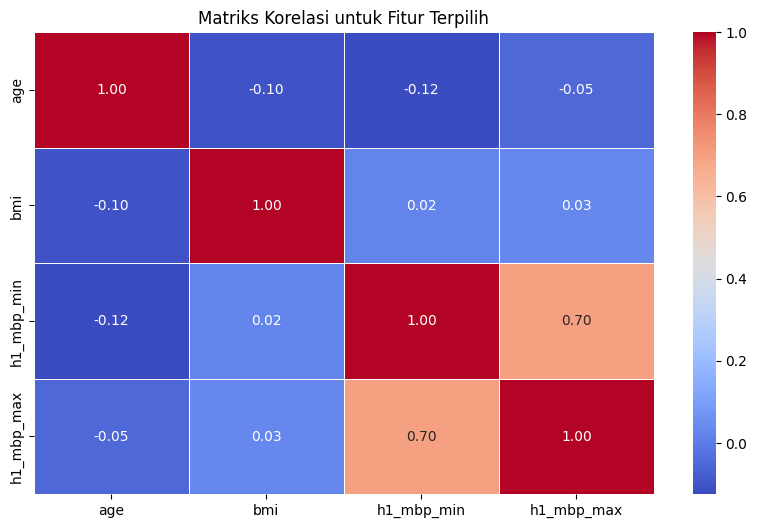

In [28]:
# **Korelasi antara variabel numerik**
# Pilih subset fitur numerik yang diinginkan
selected_features_for_correlation = ['age', 'bmi', 'h1_mbp_min', 'h1_mbp_max', 'hospital_admit_source', ]

# Pastikan hanya fitur numerik yang digunakan dalam matriks korelasi
numerical_selected_features = [col for col in selected_features_for_correlation if col in data.select_dtypes(include=['float64', 'int64']).columns]

# Buat matriks korelasi untuk fitur yang dipilih
correlation_matrix = data[numerical_selected_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi untuk Fitur Terpilih')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

PEMILIHAN FITUR YANG DI GUNAKAN

In [29]:
# Pilih fitur yang direkomendasikan
selected_features = [
    'age', 'bmi', 'gender', 'pre_icu_los_days',
    'elective_surgery', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max',
    'aids', 'cirrhosis', 'solid_tumor_with_metastasis', 'hospital_admit_source'
]

data_cluster = data[selected_features]

CEK MISSING VALUES DAN MENGISINYA DENGAN MEDIAN UNTUK FITUR NUMERIK

In [30]:
# Mengganti missing values pada fitur numerik dengan median
numerical_cols = data_cluster.select_dtypes(include=['float64', 'int64']).columns
imputer_median = SimpleImputer(strategy='median')
data_cluster[numerical_cols] = imputer_median.fit_transform(data_cluster[numerical_cols])

<ipython-input-30-3b37385c93c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster[numerical_cols] = imputer_median.fit_transform(data_cluster[numerical_cols])


CEK MISSING VALUES DAN MENGISINYA DENGAN MEDIAN UNTUK FITUR KATEGORIKAL

In [31]:
# Mengganti missing values pada fitur kategorikal dengan modus
categorical_cols = data_cluster.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
data_cluster[categorical_cols] = imputer_mode.fit_transform(data_cluster[categorical_cols])

<ipython-input-31-93e6f6d4e166>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster[categorical_cols] = imputer_mode.fit_transform(data_cluster[categorical_cols])


MENGHAPUS DIPLIKASI DATA

In [32]:
# 3.2. Menghapus Data Duplikat
data_cluster = data_cluster.drop_duplicates()

MELAKUKAN ENCODING

In [33]:
# Menangani kategori seperti 'gender' dan 'hospital_admit_source'
categorical_cols = ['gender', 'hospital_admit_source']
encoder = LabelEncoder()
for col in categorical_cols:
    data_cluster[col] = data_cluster[col].fillna('Unknown')  # Tangani missing kategori
    data_cluster[col] = encoder.fit_transform(data_cluster[col])

In [34]:
# Menangani kategori seperti 'gender' dan 'hospital_admit_source'
encoder = LabelEncoder()
for col in categorical_cols:
    data_cluster[col] = encoder.fit_transform(data_cluster[col])

NORMALISASI DAN STANDARISASI

In [35]:
# Menggunakan StandardScaler untuk standarisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

MENGGUNAKAN METODE CLSUTERISASI K-MEANS ++

In [36]:
best_k = 3  # Pilih jumlah cluster yang tetap (misalnya k=3)
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)  # KMeans++ digunakan untuk inisialisasi cluster center
clusters_no_elbow = kmeans.fit_predict(data_scaled)

In [37]:
# Menambahkan kolom 'Cluster' ke dataframe
data_cluster['Cluster'] = clusters_no_elbow

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [38]:
sil_score_no_elbow = silhouette_score(data_scaled, clusters_no_elbow)
print(f"Silhouette Score (k=3): {sil_score_no_elbow}")

Silhouette Score (k=3): 0.32840076755934616


METODE ELBOW UNUTK CARI CLUSTER OPTIMAL

In [39]:
# Gunakan metode Elbow untuk menentukan jumlah cluster optimal
inertia = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

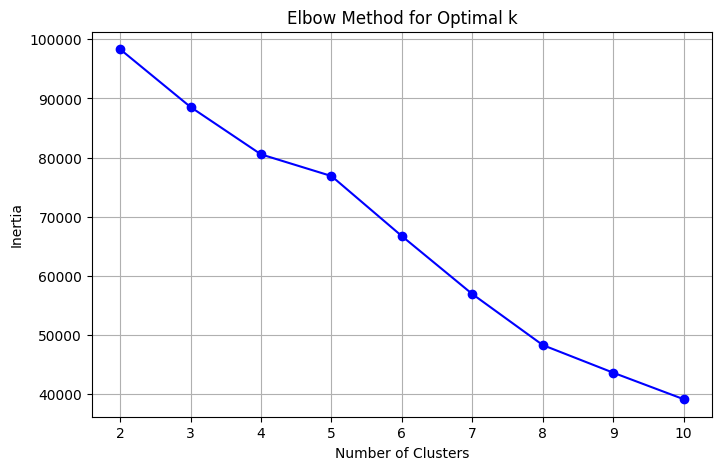

In [40]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, '-o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [41]:
# Pilih k=3 berdasarkan Elbow Method
kmeans_elbow = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters_elbow = kmeans_elbow.fit_predict(data_scaled)
sil_score_elbow = silhouette_score(data_scaled, clusters_elbow)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [42]:
# Lakukan feature selection untuk memilih fitur terbaik
model = LogisticRegression(max_iter=1000)  # Model untuk RFE
rfe = RFE(model, n_features_to_select=3)  # Pilih 3 fitur terbaik berdasarkan ANOVA F-value
data_selected_features_rfe = rfe.fit_transform(data_scaled, clusters_no_elbow)


In [43]:
# Model clustering dengan fitur yang dipilih
kmeans_selected = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters_selected = kmeans_selected.fit_predict(data_selected_features_rfe)

In [44]:
# Evaluasi dengan Silhouette Score setelah Feature Selection
sil_score_selected = silhouette_score(data_selected_features_rfe, clusters_selected)

In [45]:
# Tampilkan hasil evaluasi
print(f"Silhouette Score tanpa Feature Selection: {sil_score_no_elbow}")
print(f"Silhouette Score setelah Feature Selection: {sil_score_selected}")
print(f"Silhouette Score menggunakan Elbow Method: {sil_score_elbow}")

Silhouette Score tanpa Feature Selection: 0.32840076755934616
Silhouette Score setelah Feature Selection: 0.6845400864262363
Silhouette Score menggunakan Elbow Method: 0.21870839131944367


HASIL

1. Silhouette Score tanpa Feature Selection: 0.32840076755934616
2. Silhouette Score setelah Feature Selection: 0.6845400864262363
3. Silhouette Score menggunakan Elbow Method: 0.21870839131944367

SECARA KESELURUHAN MODEL CLUSTERISASI INI MENGHASILKAN COHERENCE SCORE SEBESAR 0.68

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

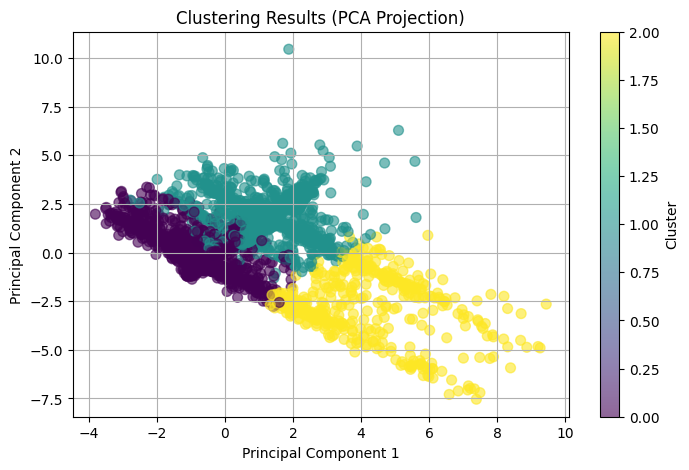

In [46]:
# **PCA untuk Visualisasi**
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_no_elbow, cmap='viridis', s=50, alpha=0.6)
plt.title('Clustering Results (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [56]:
print("\nAnalisis dan Interpretasi Hasil Cluster:")

# Menggunakan range yang dimulai dari 0 hingga best_k
for cluster in range(best_k):  # Mulai dari Cluster 0 hingga Cluster 2 (k=3)
    cluster_data = data_cluster[data_cluster['Cluster'] == cluster]
    print(f"\nCluster {cluster + 1} Summary:")  # Menambahkan 1 pada cluster untuk menampilkan 1, 2, 3
    print(cluster_data.describe().transpose())



Analisis dan Interpretasi Hasil Cluster:

Cluster 1 Summary:
                              count        mean        std        min  \
age                          7603.0   62.462712  18.450878  18.000000   
bmi                          7603.0   28.996144   8.099123  14.900000   
gender                       7603.0    0.535447   0.498775   0.000000   
pre_icu_los_days             7603.0    0.499664   1.341059  -0.208333   
elective_surgery             7603.0    0.000000   0.000000   0.000000   
h1_arterial_po2_min          7603.0  116.269065  17.627431  30.000000   
h1_pao2fio2ratio_max         7603.0  230.542396  28.560214  42.620000   
aids                         7603.0    0.001052   0.032423   0.000000   
cirrhosis                    7603.0    0.013153   0.113936   0.000000   
solid_tumor_with_metastasis  7603.0    0.000789   0.028083   0.000000   
hospital_admit_source        7603.0    2.177298   0.842895   0.000000   
Cluster                      7603.0    0.000000   0.000000   0

1. Cluster 1

terdiri dari individu yang lebih tua, dengan rata-rata usia 62.46 tahun, dan memiliki BMI berlebih dengan rata-rata 28.99. Sebagian besar individu di cluster ini menghabiskan waktu singkat di ICU (rata-rata 0.5 hari) dan tidak menjalani prosedur elective surgery (0%). Selain itu, prevalensi penyakit komorbiditas seperti AIDS, Cirrhosis, dan Solid Tumor with Metastasis sangat rendah.

Interpretasi:

* Cluster 1 kemungkinan besar mewakili individu yang lebih tua, dengan kondisi kesehatan yang relatif stabil. Mereka memiliki BMI berlebih, tetapi jarang menjalani prosedur elective surgery dan tidak memiliki banyak penyakit serius.
* Mereka menghabiskan waktu relatif singkat di ICU, yang menunjukkan bahwa kondisi mereka tidak terlalu kritis dan tidak memerlukan perawatan intensif yang lama.

2. Cluster 2:

Karakteristik dan Interpretasi
Cluster 2 terdiri dari individu yang lebih tua, dengan rata-rata usia 64.20 tahun, dan mereka cenderung memiliki BMI berlebih (rata-rata 29.16). Sebagian besar individu di cluster ini menjalani elective surgery (84.35%) dan menghabiskan waktu lebih lama di ICU (rata-rata 1.98 hari). Selain itu, cluster ini memiliki prevalensi yang lebih tinggi dari penyakit serius seperti Solid Tumor with Metastasis (7.78%).

Interpretasi:

* Cluster 2 mewakili individu yang lebih tua dan memiliki kondisi kesehatan yang lebih kompleks. Mereka lebih sering menjalani elective surgery dan menghabiskan waktu lebih lama di ICU, yang menunjukkan mereka memerlukan perawatan medis yang lebih intensif.
* Keberadaan tumor metastasis dan prevalensi penyakit serius lainnya menunjukkan bahwa pasien dalam cluster ini mungkin memiliki kondisi medis yang lebih serius dan lebih membutuhkan rumah sakit dengan perawatan intensif.

3. Cluster 3:

Karakteristik dan Interpretasi

Cluster 3 terdiri dari individu yang lebih tua, dengan rata-rata usia 62.97 tahun, dan memiliki BMI berlebih (rata-rata 27.51). Mereka menghabiskan waktu lebih sedikit di ICU (rata-rata 0.91 hari) dibandingkan dengan Cluster 2, tetapi masih lebih banyak menjalani elective surgery dibandingkan Cluster 1 (47.87%). Pao2/Fio2 ratio mereka lebih tinggi (rata-rata 397.07), yang menunjukkan fungsi pernapasan yang lebih baik.

Interpretasi:

* Cluster 3 terdiri dari individu yang lebih tua dengan BMI berlebih, yang lebih sering menjalani elective surgery dibandingkan dengan Cluster 1, namun mereka menghabiskan waktu yang relatif lebih sedikit di ICU.
* Mereka menunjukkan fungsi pernapasan yang lebih baik dengan Pao2/Fio2 ratio yang lebih tinggi, yang mengindikasikan bahwa mereka mungkin memiliki kondisi medis yang lebih stabil dibandingkan dengan Cluster 2.
Tumor metastasis ada dalam cluster ini, tetapi prevalensinya lebih rendah (1.18%) dibandingkan dengan Cluster 2.



4. Kesimpulan Umum dan Interpretasi Logika Bisnis

Cluster 1:

* Pasien lebih tua dengan kondisi kesehatan yang stabil dan BMI berlebih. Mereka tidak banyak menjalani elective surgery dan menghabiskan waktu singkat di ICU.
* Mereka lebih cocok untuk perawatan rutin atau rawat jalan karena mereka tidak terlalu kritis.

Cluster 2:

* Pasien lebih tua, lebih sering menjalani elective surgery, dan menghabiskan lebih lama di ICU.
* Mereka memiliki lebih banyak kondisi medis yang serius (terutama tumor metastasis) dan memerlukan perawatan medis yang intensif.
* Mereka lebih cocok untuk rumah sakit dengan fasilitas perawatan intensif dan rawat inap.

Cluster 3:

* Pasien lebih tua dengan fungsi pernapasan yang lebih baik dan lebih banyak menjalani elective surgery.
* Meskipun menghabiskan waktu lebih sedikit di ICU, mereka memerlukan perawatan medis, tetapi mungkin lebih cocok untuk perawatan dengan pengawasan.
* Mereka tidak sekompleks pasien di Cluster 2, tetapi tetap memerlukan perhatian medis.

Pola yang Bisa Dimanfaatkan:

1. Cluster 1 lebih cocok untuk perawatan rutin atau rawat jalan, dengan pengawasan ringan karena kondisi mereka relatif stabil.
2. Cluster 2 lebih cocok untuk rumah sakit dengan fasilitas perawatan intensif karena mereka lebih sering membutuhkan elective surgery dan memiliki kondisi medis yang lebih kompleks, seperti tumor metastasis.
3. Cluster 3 memerlukan perawatan medis, dengan beberapa individu yang lebih stabil dan lebih sedikit komplikasi dibandingkan Cluster 2.
Kesimpulan:

Secara keseluruhan, hasil clustering ini memberikan wawasan penting yang dapat dimanfaatkan untuk alokasi sumber daya di rumah sakit. Misalnya:

1. Cluster 1 bisa diberikan layanan rawat jalan, sementara 2. Cluster 2 membutuhkan fasilitas ICU dan perawatan lebih intensif.
3. cluster 3 mungkin membutuhkan pengawasan medis lebih sedikit dibandingkan Cluster 2, tetapi masih memerlukan perhatian medis dan prosedur elective surgery.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [57]:
# 6. Ekspor Hasil
data_cluster.to_csv('Clustered_Data.csv', index=False)

print("Program selesai! Silakan cek hasil clusterisasi pada file 'Clustered_Data.csv'.")

Program selesai! Silakan cek hasil clusterisasi pada file 'Clustered_Data.csv'.
